In [1]:
import os
print(os.getcwd())

/mnt/c/Users/User/Documents/Python_Scripts/Automatic_Streaming_Highlights


In [2]:
import matplotlib.pyplot as plt

In [3]:
import time

In [8]:
import os
os.chdir("/mnt/c/Users/User/Videos/VODs/Fall_Guys/Prueba1") #Path of video directory
curDir = os.getcwd()
print(curDir)

/mnt/c/Users/User/Videos/VODs/Fall_Guys/Prueba1


In [9]:
!ls

fall1.mp4


In [10]:
def showTimeGraph(x1,y1): 
    fig, ax = plt.subplots() # Create a figure and an axes.
    ax.plot(x1,y1) # Plot some data on the axes.

    ax.set(xlabel='Time (seconds)', ylabel='Volume',
        title='Volume at each second of the video')
    ax.grid()
    #ax.legend()  # Add a legend.

    fig.savefig("volumesPlot.png")
    plt.show()
    return 1

In [11]:
import numpy as np # for numerical operations
from moviepy.editor import VideoFileClip, concatenate

start = time.time()

clip = VideoFileClip("fall1.mp4")
cut = lambda i: clip.audio.subclip(i,i+1).to_soundarray(fps=22000)
volume = lambda array: np.sqrt(((1.0*array)**2).mean())
volumes = [volume(cut(i)) for i in range(0,int(clip.duration-1))]

end = time.time()
print(end - start)

13.495588302612305


In [12]:
print(len(volumes))

a_list = list(range(0, len(volumes)))

#print(a_list)

7076


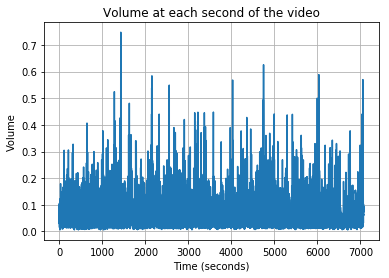

1

In [13]:
showTimeGraph(a_list, volumes)

In [14]:
averaged_volumes = np.array([sum(volumes[i:i+10])/10
                             for i in range(len(volumes)-10)])

In [15]:
a_list = list(range(0, len(volumes)-10))

In [16]:
print(len(a_list))

7066


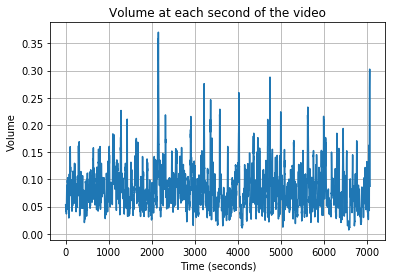

1

In [17]:
showTimeGraph(a_list, averaged_volumes)

In [18]:
increases = np.diff(averaged_volumes)[:-1]>=0
decreases = np.diff(averaged_volumes)[1:]<=0
peaks_times = (increases * decreases).nonzero()[0]
peaks_vols = averaged_volumes[peaks_times]
peaks_times = peaks_times[peaks_vols>np.percentile(peaks_vols,90)]

In [19]:
final_times=[peaks_times[0]]
for t in peaks_times:
    if (t - final_times[-1]) < 60:
        if averaged_volumes[t] > averaged_volumes[final_times[-1]]:
            final_times[-1] = t
    else:
        final_times.append(t)

In [20]:
print(final_times)

[105, 313, 642, 797, 1011, 1124, 1284, 1427, 1675, 1785, 2055, 2151, 2315, 2463, 2569, 2690, 2905, 3213, 3364, 3578, 3761, 4026, 4268, 4365, 4460, 4742, 4870, 4991, 5078, 5295, 5507, 5620, 5752, 5995, 6294, 6440, 6523, 6755, 7056]


In [21]:
start = time.time()
final = concatenate([clip.subclip(max(t-5,0),min(t+5, clip.duration))
                     for t in final_times])
final.to_videofile('fall1_cuts.mp4') # low quality is the default
end = time.time()
print("Time of the algorithm: ")
print(end - start)

[MoviePy] >>>> Building video fall1_cuts.mp4
[MoviePy] Writing audio in fall1_cutsTEMP_MPY_wvf_snd.mp3


100%|██████████| 8600/8600 [00:13<00:00, 635.99it/s]

[MoviePy] Done.
[MoviePy] Writing video fall1_cuts.mp4



100%|█████████▉| 11700/11701 [01:29<00:00, 131.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: fall1_cuts.mp4 

Time of the algorithm: 
113.00234651565552
